In [1]:
import numpy as np
import pandas as pd
import torch
_ = torch.manual_seed(10)
import os
import math
from sbi import utils as utils
import sbi
from sbi import inference
from sbi.inference import SNPE, prepare_for_sbi, simulate_for_sbi
import scipy.io as sio

In [2]:
initial_celltracking_data = sio.loadmat("CellTrack_10k.mat")
syn_data = sio.loadmat("syntheticData2_cellTracking.mat")

In [3]:
theta_np = initial_celltracking_data["theta"]
summaries = initial_celltracking_data["summaries"]
obs = syn_data["sy"]

theta = torch.from_numpy(theta_np).to(torch.float32)
x = torch.from_numpy(summaries).to(torch.float32)
x_0 = torch.from_numpy(obs).to(torch.float32)

priorDist = utils.BoxUniform(torch.zeros(6),torch.ones(6))
def simulator(theta):
    return theta
_,prior = prepare_for_sbi(simulator,priorDist)

In [4]:
inference = sbi.inference.SNLE(prior=prior, density_estimator='nsf')
density_estimator = inference.append_simulations(theta, x).train()
posterior = inference.build_posterior(density_estimator)

 Neural network successfully converged after 152 epochs.

In [5]:
posterior_samples = posterior.sample((10000,),x = x_0,num_chains = 10)

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/10100 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/10100 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/10100 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/10100 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/10100 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/10100 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/10100 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/10100 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/10100 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/10100 [00:00<?, ?it/s]

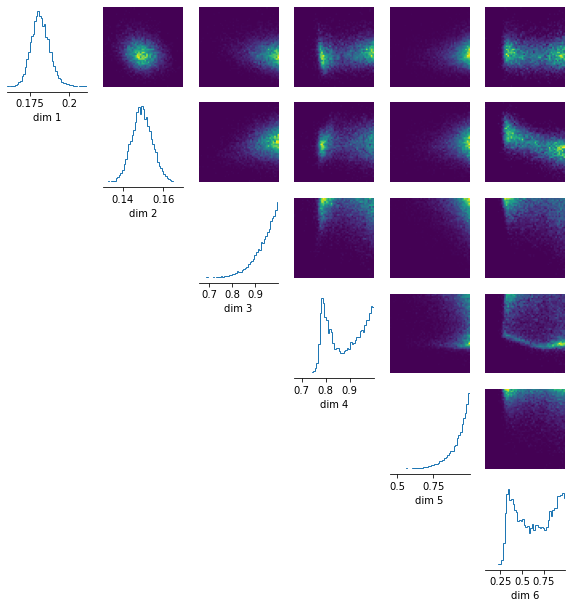

In [6]:
from sbi import analysis as analysis
_ = analysis.pairplot(
    posterior_samples, figsize=(10, 10)
)

In [7]:
mdic = {"theta_new": posterior_samples.numpy(), "theta_old":theta.numpy(), "sims_old":x.numpy(),"observation":x_0.numpy()}
sio.savemat("SNLE_nsf_syn2_celltrack_20k.mat", mdic)